# Breast Cancer Risk Predictor

This notebook predicts the risk of breast cancer by assessing general features.
The  model created in this jupyter notebook will be used during chatbot created in another notebook `Main Breast Cancer Helper Chatbox`

The data is collected from  https://www.bcsc-research.org/data/rfdataset/risk-estimation-dataset-download

The model created in this notebook will be saved and will be used in the Helper Chatbox


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
bc_risk_data_1 = pd.read_table("data/risk.txt", sep = " " ,names= ['menopaus', 'agegrp', 'density','race','Hispanic','bmi','agefirst','nrelbc','brstproc','lastmamm','surgmeno','hrt','invasive','cancer','training','count'])

bc_risk_data_2 =  pd.read_table("data/risk_rand.txt", sep = " " ,names= ['menopaus', 'agegrp', 'density','race','Hispanic','bmi','agefirst','nrelbc','brstproc','lastmamm','surgmeno','hrt','invasive','cancer','training','count'])


In [144]:
data = pd.concat([bc_risk_data_1,bc_risk_data_2], axis=0)

In [145]:
data.head()

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,training,count
0,0,1,1,1,0,1,0,0,0,0,9,9,0,0,1,4
1,0,1,1,1,0,1,0,0,0,9,9,9,0,0,0,2
2,0,1,1,1,0,1,0,0,0,9,9,9,0,0,1,4
3,0,1,1,1,0,1,0,0,1,9,9,9,0,0,1,1
4,0,1,1,1,0,1,0,1,0,0,9,9,0,0,1,1


## Feature Description

"Data collection and sharing was supported by the National Cancer Institute-funded Breast Cancer Surveillance Consortium (HHSN261201100031C). You can learn more about the BCSC at: http://www.bcsc-research.org/."


Below is the description of features 

1. `menopaus` : Meanopause status:

    0 = premenopausal; 1 = postmenopausal or age>=55 ; 9 = unknown

    
    
2. `agegrp`: Age Group: 

    `1 = 35-39; 2 = 40-44; 3 = 45-49; 4 = 50-54; 5 = 55-59; 6 = 60-64; 7 = 65-69; 8 = 70-74; 9 = 75-79; 10 = 80-84`


3. `density`: BI-RADS breast density:

    `codes 1 = Almost entirely fat; 2 = Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Unknown or different measurement system`

4. `race` Race:

     `1 = white; 2 = Asian/Pacific Islander; 3 = black; 4 = Native American; 5 = other/mixed; 9 = unknown`


5. `Hispanic` a person of Cuban, Mexican, Puerto Rican, South or Central American, or other Spanish culture or origin regardless of race. : 

    `0 = no; 1 = yes; 9 = unknown`

    
    
 6. `bmi` Body mass index (kg/m2):
 
    `Body mass index: 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = unknown`

    
    
    
7. `agefirst` Age (years) at first birth:
 
 
      `0 = Age < 30; 1 = Age 30 or greater; 2 = Nulliparous; 9 = unknown`
   

8. `nrelbc`  Number of first degree relatives with breast cancer:

    `0 = zero; 1= one; 2 = 2 or more; 9 = unknown`
    
    
9. `brstproc` Previous breast biopsy or aspiration or any procedure:

    `0 = no; 1 = yes; 9 = unknown`

    
10.  `lastmamm` : Result of last mammogram before the index mammogram:
  
  `0 = negative; 1 = false positive; 9 = unknown`
 
 
11. `surgmeno` Surgical menopause: 

    `0 = natural; 1 = surgical; 9 = unknown or not menopausal (menopaus=0 or menopaus=9)`
    

12. `hrt` Current hormone therapy: 


    `Current hormone therapy: 0 = no; 1 = yes; 9 = unknown or not menopausal (menopaus=0 or menopaus=9)`

  
  
13. `invasive` Diagnosis of invasive breast cancer within one year of the index screening mammogram:

    `0 = no; 1 = yes`


14. `cancer`  Diagnosis of invasive or ductal carcinoma in situ breast cancer within one year of the index screening mammogram: 

    `0 = no; 1 = yes`
    
    
15. `training` : Training data: 

    `0 = no (validation); 1 = yes (training)`


16. `count` Frequency count of this combination of covariates and outcomes (all variables 1 to 15):
    
    `Numerical`



## Dependent variable:

There are two depended variables `invasive` and `cancer` . we will take the variable `cancer` as our depended variable and create model for it.

We are choosing `cancer` as dependent varibale as it is inclusive of `invasive` cancer and also consist of non-invasive or `in-situ` cancer.

In [146]:
# Lets check value couts of depended variables
data["cancer"].value_counts()

0    446984
1     15579
Name: cancer, dtype: int64

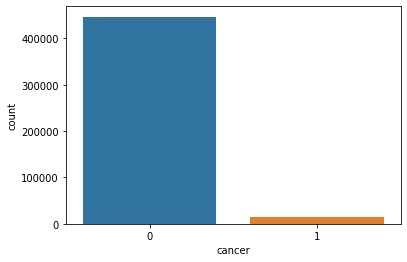

In [147]:
sns.countplot(x= "cancer", data = data);

### Columns  to be dropped and skewed data to be corrected

We see that the result data is very `skwed`, to overcome this issue will increase samples where cancer = 1 ony in `training data` set, `testing data` set will have skwed data to verify

we will drop `invasive` as we need only 1 dependent variable, and `cancer` has invasive and non-invasive form in it.
we will drop `count` as its not a feature to be taken from users and we will also drop `training` once we separate training and validation data.

In [148]:
train_Xy = data[data["training"]==1]
valid_Xy = data[data["training"]==0]


cancer_data = train_Xy[train_Xy["cancer"]==1]
non_cancer_data = train_Xy[train_Xy["cancer"]==0]

# increase training samples where cancer = 1 in our train data set
newdf = pd.DataFrame(np.repeat(cancer_data.values, 25, axis=0))
newdf.columns = cancer_data.columns
cancer_data = newdf


selected_non_cancer_data = non_cancer_data.sample(frac=1, random_state=1)
train_Xy = pd.concat([cancer_data,selected_non_cancer_data], axis=0)
train_Xy = train_Xy.sample(frac=1, random_state=1)

train_Xy["cancer"].value_counts()

0    288396
1    284050
Name: cancer, dtype: int64

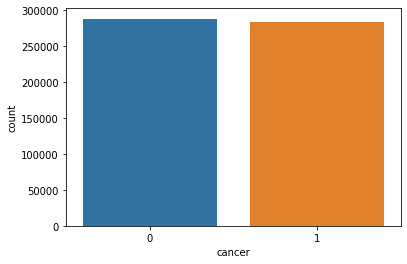

In [149]:
# count of dependent variable in training set
sns.countplot(x = "cancer", data=train_Xy);

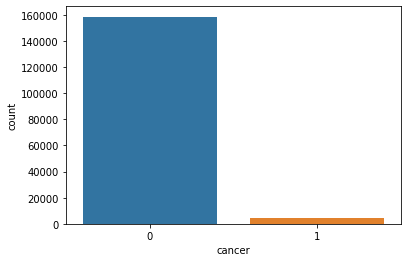

In [150]:
# count of dependent variable in testing set
sns.countplot(x = "cancer", data=valid_Xy);

## Exploratry data analysis

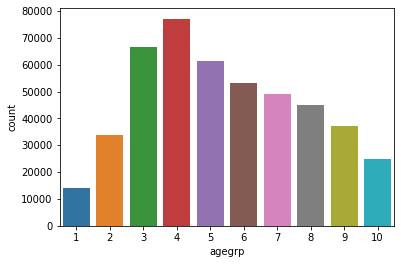

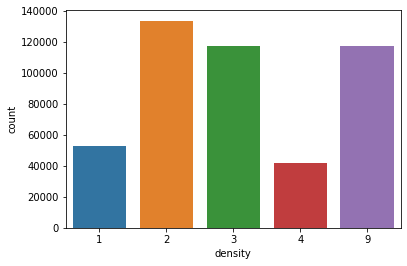

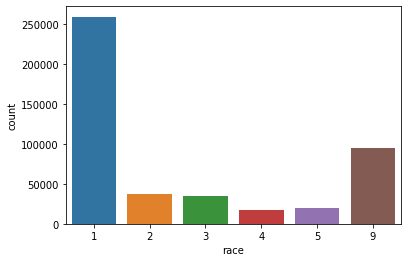

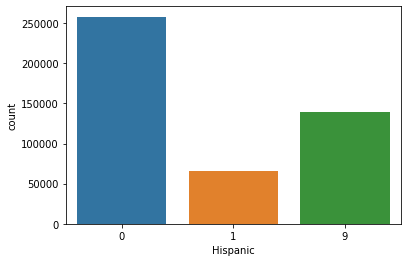

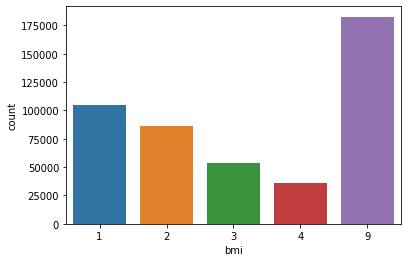

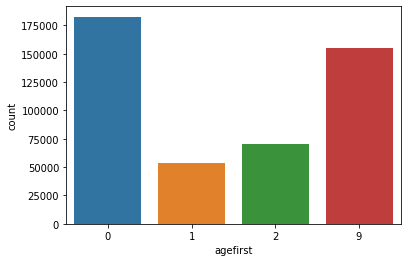

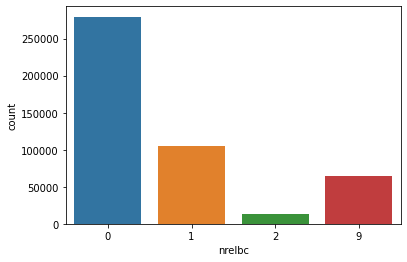

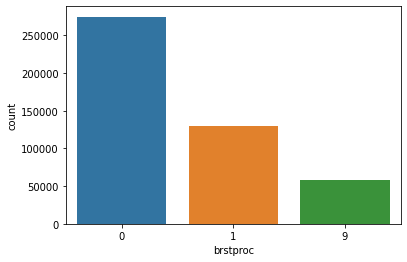

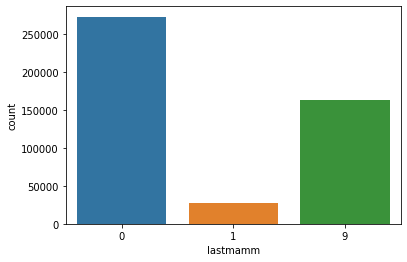

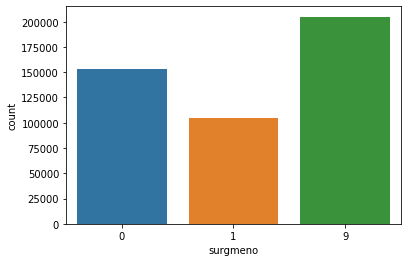

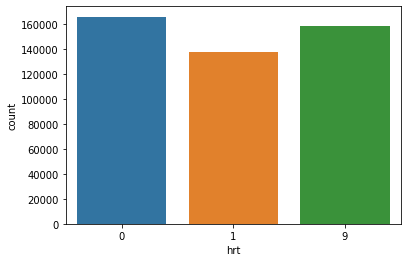

In [151]:
#Check data of count
for col in X_train.columns[1:]:
    plt.figure()
    sns.countplot(x=col, data = data)

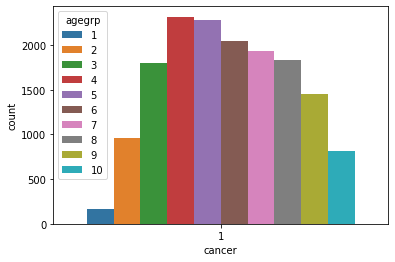

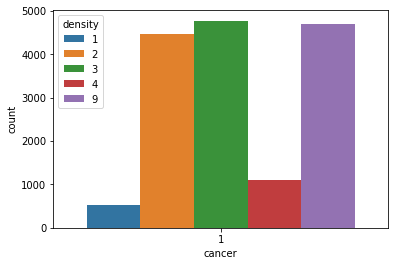

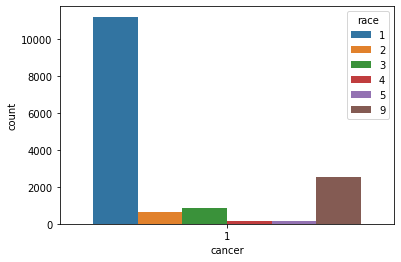

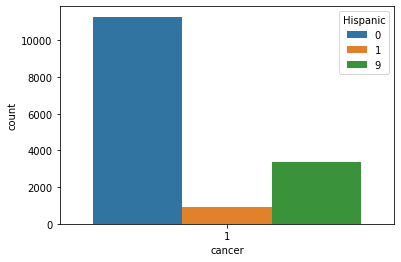

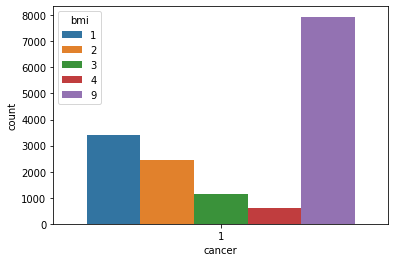

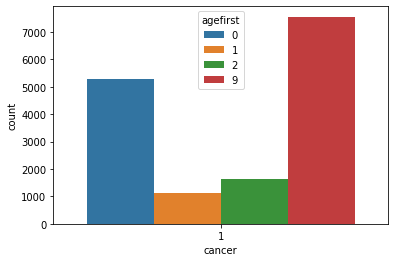

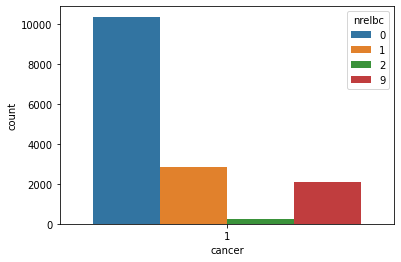

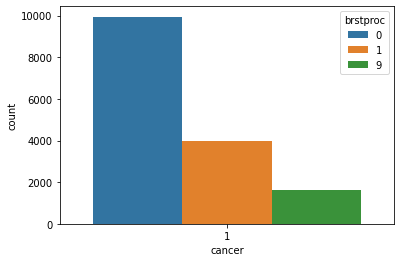

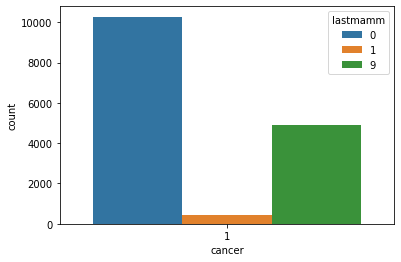

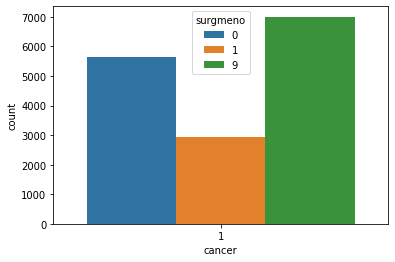

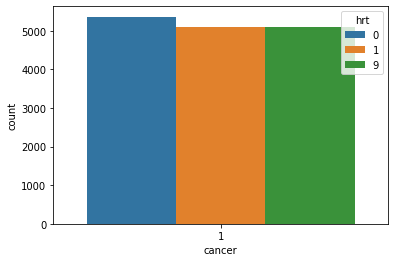

In [152]:
#Check of columns with actual cancer
for col in X_train.columns[1:]:
    plt.figure()
    sns.countplot(x="cancer",hue=col, data = data[data["cancer"]==1])

### There is `race` baise as per above graphs hence we will need to reduce samples where `race` == 1

<AxesSubplot:xlabel='cancer', ylabel='count'>

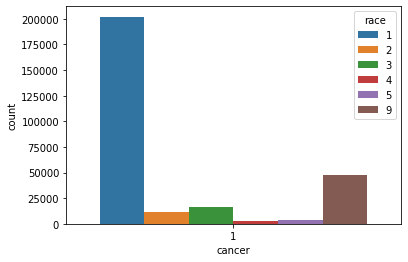

In [153]:
sns.countplot(x="cancer",hue="race", data = train_Xy[train_Xy["cancer"]==1])

In [154]:
white_data = train_Xy[train_Xy["race"]==1]
non_white_data = train_Xy[train_Xy["race"]!=1]
white_data = white_data.sample(frac=0.4, random_state=1)
train_Xy = pd.concat([white_data,non_white_data], axis=0)
train_Xy = train_Xy.sample(frac=1, random_state=1)

<AxesSubplot:xlabel='cancer', ylabel='count'>

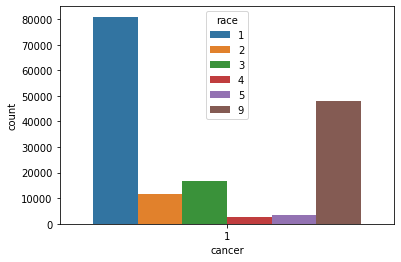

In [155]:
sns.countplot(x="cancer",hue="race", data = train_Xy[train_Xy["cancer"]==1])

### Check correlation among columns 

In [156]:
corr = X_train.corr()

<AxesSubplot:>

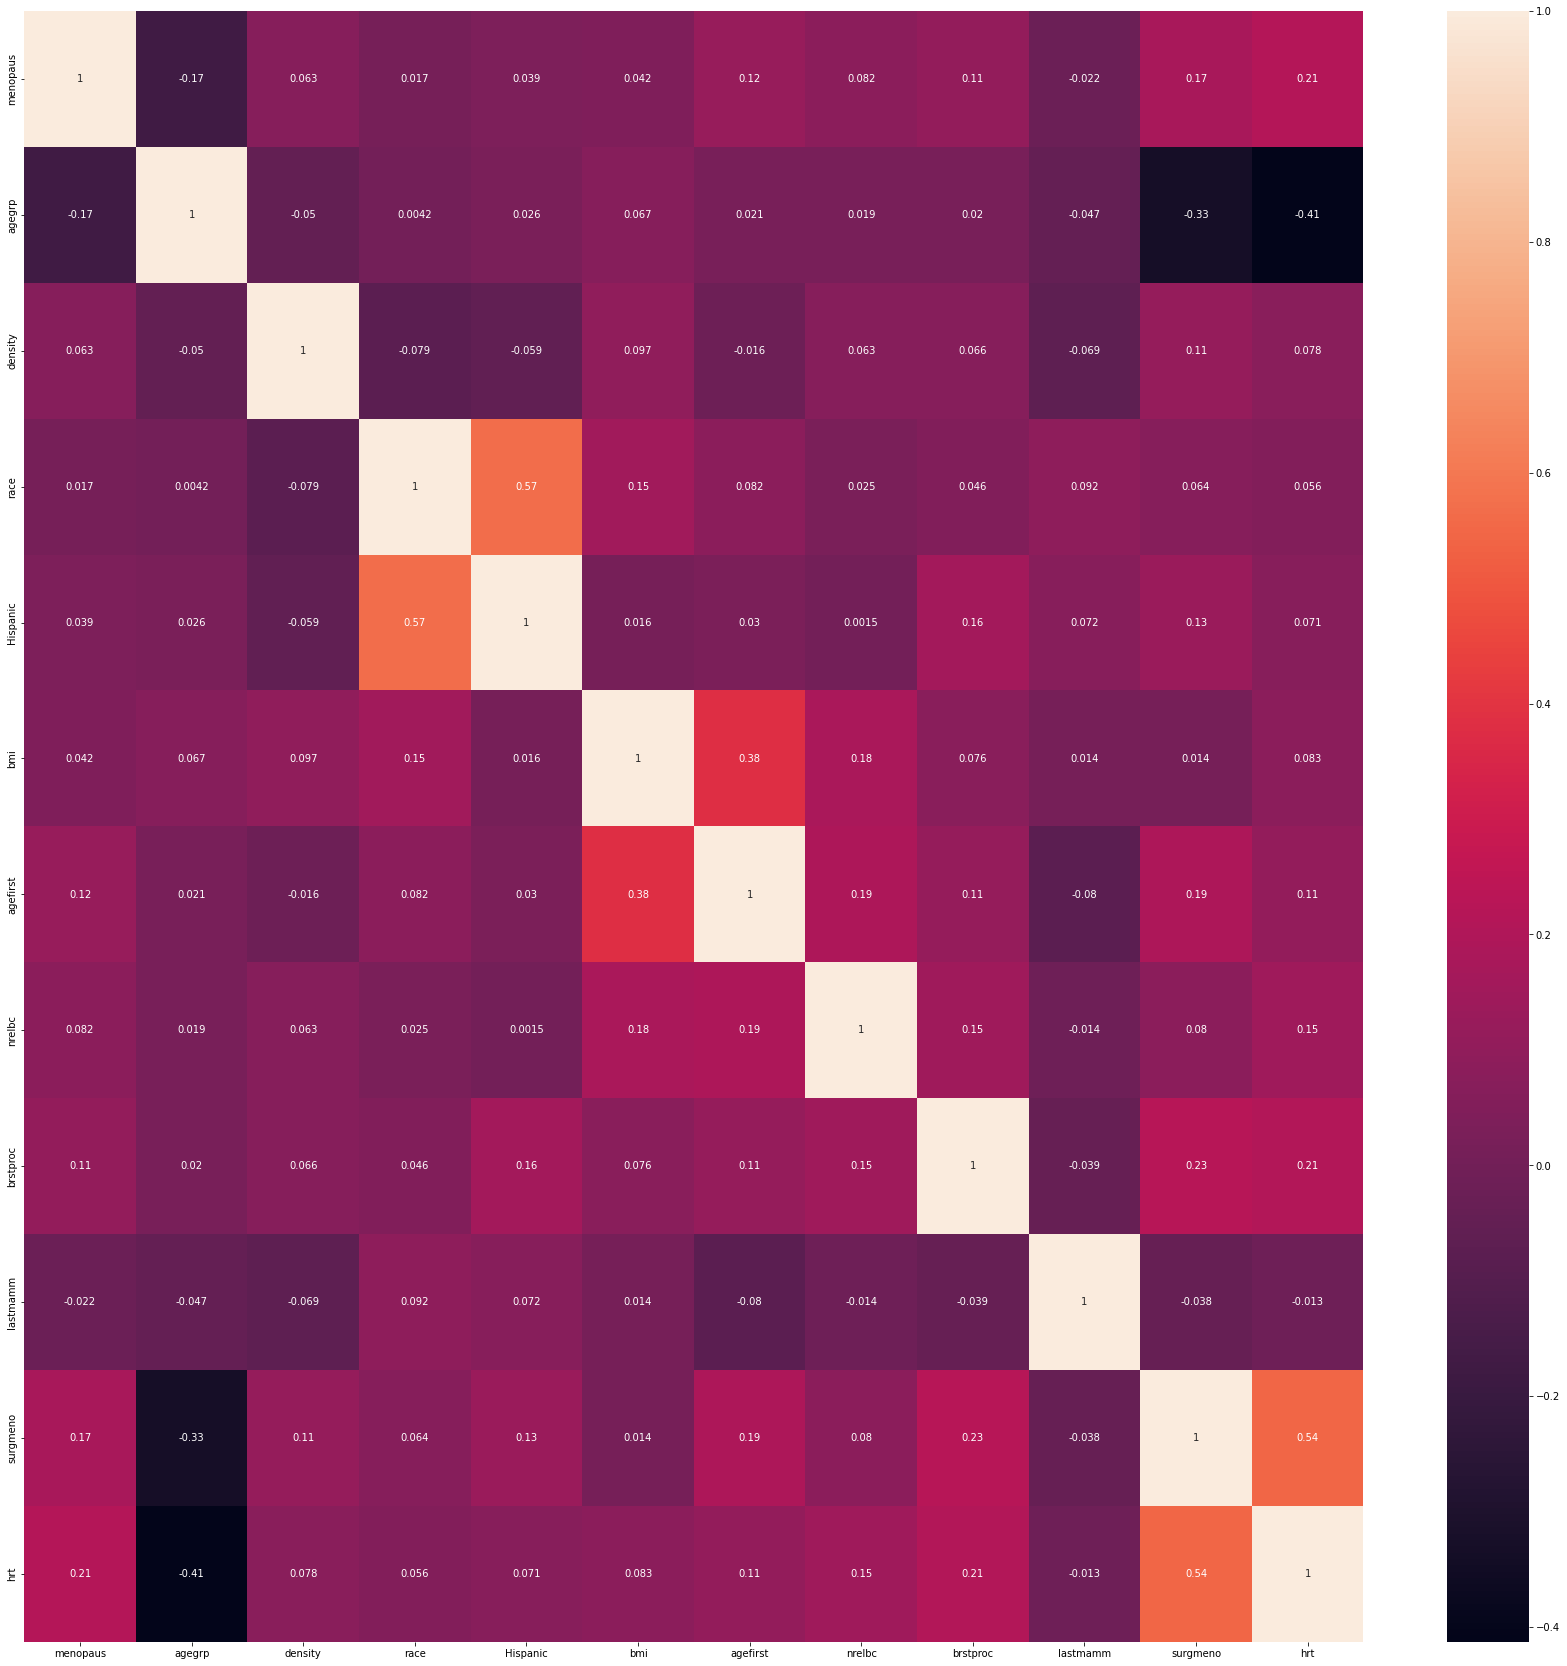

In [157]:
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot = True)

As per the above heatmap, we can see that no 2 or more columns are highly correlated

In [158]:
X_train = train_Xy.drop(["count","invasive", "cancer", "training"], axis = 1)
y_train = train_Xy["cancer"]

In [159]:
X_val = valid_Xy.drop(["count","invasive", "cancer","training"], axis = 1)
y_val = valid_Xy["cancer"]

## Hyper param tuning of LGBMClassifier

We have chosen LGBMClassifier for this classifcation task as it is faster then other Xgboost and Catboot classifiers with similar accuracy.
hyper param tuning using optuna, howeve in our case our validation data has more cases with *no* cancer and few *with* Cancer, we will try to keep accuracy/recall withing <80 % while training as not to *`overfit`* the model.
Hence we are keeping trail = 2

In [160]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    
    learning_rate = trial.suggest_float("learning_rate", 0.05, 0.99, log=True)
    max_depth = trial.suggest_int("max_depth", 3, 100, log=True)
    n_estimators = trial.suggest_int("n_estimators", 50, 1000, log=True)



    
    mod = LGBMClassifier(learning_rate=learning_rate, 
                       max_depth=max_depth,
                       n_estimators=n_estimators)
    
    score = cross_val_score(mod, X_train,y_train, n_jobs=-1, cv=3, scoring="accuracy")
    accuracy = score.mean()
    return accuracy

scoreLG = optuna.create_study(direction="maximize")

scoreLG.optimize(objective, 
               n_trials=2)


[I 2022-06-06 09:01:14,122] A new study created in memory with name: no-name-138d434d-ff2c-4274-8148-144759ecf84b
[I 2022-06-06 09:01:17,572] Trial 0 finished with value: 0.8297185535478043 and parameters: {'learning_rate': 0.7843745086693809, 'max_depth': 6, 'n_estimators': 77}. Best is trial 0 with value: 0.8297185535478043.
[I 2022-06-06 09:01:28,056] Trial 1 finished with value: 0.8345441641187469 and parameters: {'learning_rate': 0.08913269990801806, 'max_depth': 10, 'n_estimators': 396}. Best is trial 1 with value: 0.8345441641187469.


In [161]:
LGBM_param = scoreLG.best_params
LGBM_param

{'learning_rate': 0.08913269990801806, 'max_depth': 10, 'n_estimators': 396}

In [162]:
##### from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
modLG = LGBMClassifier(learning_rate=0.1300403036405061,
 max_depth= 6,
 n_estimators= 133)
modLG.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.1300403036405061, max_depth=6, n_estimators=133)

In [163]:
%%time
pred_val = modLG.predict(X_val)

Wall time: 261 ms


In [164]:
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix

print(f"accuracy_score = {accuracy_score(y_val, pred_val)}")
print(f"f1_score = {f1_score(y_val, pred_val)}")
print(f"recall_score = {recall_score(y_val, pred_val)}")
print(f"precision_score = {precision_score(y_val, pred_val)}")
print(f"roc_auc_score = {roc_auc_score(y_val, pred_val)}")

accuracy_score = 0.7024907097447867
f1_score = 0.11761276688770678
recall_score = 0.7654730851316102
precision_score = 0.06370004933399112
roc_auc_score = 0.733144517948558


In [165]:
conf_mat = confusion_matrix(y_val, pred_val)
conf_mat

array([[111141,  47447],
       [   989,   3228]], dtype=int64)

Text(69.0, 0.5, 'True label')

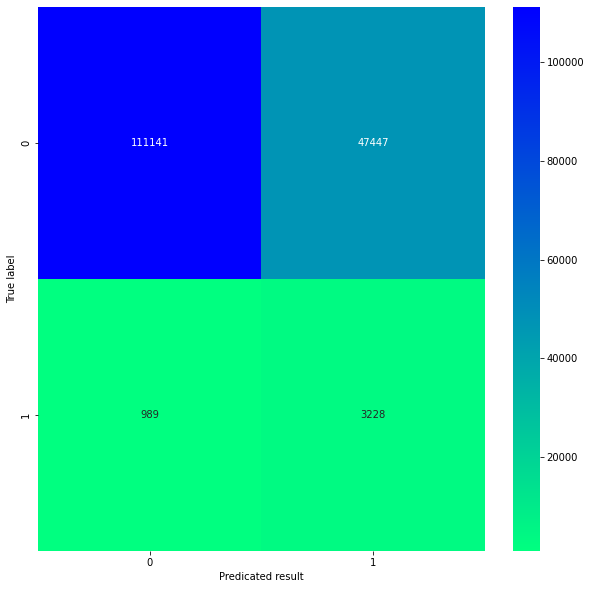

In [166]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="winter_r", fmt='g' );
plt.xlabel("Predicated result")
plt.ylabel("True label")

#### We have around 70% accuracy with 76.5% recall score

So 76.5% of samples which suggest that the patient has `cancer` will be currectly classified. 

Only 76.5% was achieved due to data scarcity issue.

## Save Model

In [167]:
import joblib
# save model
joblib.dump(modLG, 'models/BC_risk_model.pkl')
# load model
loadedModel = joblib.load('models/BC_risk_model.pkl')